In [18]:
#visualizing protostellar disks from 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as apycoords
from astroNN.gaia import gaiadr2_parallax
from mw_plot import MWPlot

import importlib
from functions import sort_functions_astrometry
importlib.reload(sort_functions_astrometry)

circumstellar_disks = pd.read_csv("data/circumstellardisks.csv")
data = pd.DataFrame(circumstellar_disks)
print(data )

                     Object Category Spec_Type R_band_mag  Distance_pc  \
0    2MASSI J1628137-243139       TT       NaN       17.7       140.00   
1                    49 Cet   Debris        A1        5.6        59.00   
2                    61 Vir   Debris       G7V        4.2         8.50   
3                    99 Her   Debris     F7+K4        4.7        15.60   
4      [MR81] H alpha 17 NE       TT       M2e       16.9       150.00   
5                    AA Tau       TT        M0       11.8       140.00   
6                    AB Aur      HAe       A0e        7.1       144.00   
7                 alpha CrB   Debris      A0 V        2.2        23.00   
8                  AS 205 A       TT        K0       12.8       128.00   
9                  AS 205 B       TT     K7+M0         14       128.00   
10                   AS 209       TT        K5       10.4       121.00   
11                   ASR 41       TT       NaN        NaN       316.00   
12                   AU Mic   Debris  

[253 rows x 12 columns]


In [19]:
print("Total number of protostellar disk objects: " + str(len(data)))

Total number of protostellar disk objects: 253


In [20]:
#distances to protostellar disks. Mapped to... milky way galactic?

#lets visualize the magnitude of the catalog!
#start by printing column
distance_pc = data[['Object','Distance_pc']]
print("Known Distances to protstellar disks")
distance_pc

Known Distances to protstellar disks


,Object,Distance_pc
0,2MASSI J1628137-243139,140.00
1,49 Cet,59.00
2,61 Vir,8.50
3,99 Her,15.60
4,[MR81] H alpha 17 NE,150.00
5,AA Tau,140.00
6,AB Aur,144.00
7,alpha CrB,23.00
8,AS 205 A,128.00
9,AS 205 B,128.00


In [21]:
astrometry = sort_functions_astrometry.astrometry_table(data)
#print(str(missing_dist) + " Data are missing for astrometry")
astrometry

,Object,Distance_pc,Distance_kpc,Distance_ly,RA_J2000,DEC_J2000,RA_J2000_Deci,DEC_J2000_Deci,Galactic longitude,Galactic latitude
0,2MASSI J1628137-243139,140.00,0.14 kpc,456.61892879986317 lyr,04 16 01.58,-51 29 11.9,4.267106,-51.486639,315d32m55.9006s,-64d47m29.1439s
1,49 Cet,59.00,0.059000000000000004 kpc,192.43226285137092 lyr,02 17 18.87,+33 50 49.9,2.288575,33.847194,112d58m33.3656s,-28d12m20.8527s
2,61 Vir,8.50,0.0085 kpc,27.72329210570598 lyr,16 19 29.24,-21 24 13.3,16.324789,-21.403694,152d33m17.9969s,-83d27m45.5638s
3,99 Her,15.60,0.0156 kpc,50.88039492341333 lyr,05 46 57.34,-14 49 19.0,5.782594,-14.821944,93d20m46.8474s,-76d02m26.7064s
4,[MR81] H alpha 17 NE,150.00,0.15 kpc,489.234566571282 lyr,11 22 05.24,-24 46 39.1,11.368122,-24.777528,92d54m00.0518s,-87d17m37.6088s
5,AA Tau,140.00,0.14 kpc,456.61892879986317 lyr,16 27 15.72,-24 38 46,16.454367,-24.646111,176d13m22.6296s,-85d55m24.809s
6,AB Aur,144.00,0.14400000000000002 kpc,469.6651839084307 lyr,04 46 53.06,+17 00 00.1,4.781406,17.000028,111d56m28.6632s,-45d10m51.7929s
7,alpha CrB,23.00,0.023 kpc,75.01596687426324 lyr,08 25 39.63,-03 54 23.1,8.427675,-3.906417,111d49m53.5504s,-66d23m43.2781s
8,AS 205 A,128.00,0.128 kpc,417.48016347416063 lyr,11 10 27.84,-37 31 51.7,11.174400,-37.531028,310d17m04.0216s,-79d30m02.948s
9,AS 205 B,128.00,0.128 kpc,417.48016347416063 lyr,04 47 06.22,+16 53 23.5,4.785061,16.889861,111d55m06.2556s,-45d17m24.3263s


In [22]:
sorted_objects = astrometry.sort_values(by ='Distance_pc' )
sorted_objects

,Object,Distance_pc,Distance_kpc,Distance_ly,RA_J2000,DEC_J2000,RA_J2000_Deci,DEC_J2000_Deci,Galactic longitude,Galactic latitude
43,epsilon Eri,3.22,0.00322 kpc,10.502235362396855 lyr,12 41 53.06,+10 14 08.3,12.698072,10.235639,122d40m12.7107s,-52d38m08.8102s
234,Tau Ceti,3.60,0.0036000000000000003 kpc,11.741629597710768 lyr,03 43 58.8,+32 01 52,3.733000,32.031111,113d58m50.8572s,-30d12m19.2207s
118,HD 20794,6.00,0.006 kpc,19.56938266285128 lyr,18 36 56.34,+38 47 01.3,18.615650,38.783694,127d50m10.8039s,-23d52m07.2977s
54,GJ 581,6.40,0.0064 kpc,20.874008173708035 lyr,20 00 35.56,-72 54 37.8,20.009878,-72.910500,300d00m51.9567s,-44d03m19.3244s
47,Fomalhaut,7.20,0.007200000000000001 kpc,23.483259195421535 lyr,12 59 59.89,-50 23 22.5,12.999969,-50.389583,302d42m18.4282s,-66d44m18.3178s
245,Vega,7.80,0.0078 kpc,25.440197461706664 lyr,21 18 27.27,-43 20 04.7,21.307575,-43.334639,282d13m31.6942s,-72d24m32.655s
2,61 Vir,8.50,0.0085 kpc,27.72329210570598 lyr,16 19 29.24,-21 24 13.3,16.324789,-21.403694,152d33m17.9969s,-83d27m45.5638s
12,AU Mic,9.94,0.00994 kpc,32.41994394479028 lyr,19 23 53.18,-40 36 57.4,19.398106,-40.615944,282d46m31.428s,-75d28m19.5565s
13,beta Leo,11.10,0.0111 kpc,36.20335792627487 lyr,05 35 13.91,-05 24 09.4,5.587197,-5.402611,103d57m24.198s,-67d11m47.4484s
98,HD 166,13.70,0.0137 kpc,44.68342374684375 lyr,04 39 17.78,+22 21 03.5,4.654939,22.350972,113d01m36.8307s,-39d53m19.4999s


In [23]:
#load sky coordinates
c, l_rad , b_rad = sort_functions_astrometry.plot_astrometry(astrometry)
c

<SkyCoord (Galactic): (l, b) in deg
    [(315.54886127, -64.79142887), (112.97593488, -28.20579243),
     (152.55499913, -83.46265662), ( 93.3463465 , -76.04075178),
     ( 92.90001438, -87.29378021), (176.22295268, -85.92355807),
     (111.94129533, -45.18105359), (111.83154178, -66.39535502),
     (310.28445044, -79.50081888), (111.91840434, -45.29009064),
     (176.02572237, -85.89278481), (303.44871386, -40.53870736),
     (282.77539666, -75.47209901), (103.95672167, -67.19651344),
     (125.90288363,   5.27165348), (172.7904656 , -85.71545403),
     (113.85643787, -33.94750081), (125.93747941, -36.09358327),
     (121.91304099,  -6.47485853), (110.43326745, -49.00907598),
     (291.71052627, -81.24996681), (302.39526812, -71.09331952),
     (301.54173191, -46.87000769), (130.35270665, -66.51971705),
     (116.64895622, -50.56273786), (122.61691243,   3.46675252),
     (296.94144439, -62.40507675), ( 23.44356391, -82.77247319),
     (284.50310786, -82.41757295), (123.95582408, -16.

Text(0, 0.5, 'Galactic Latitude')

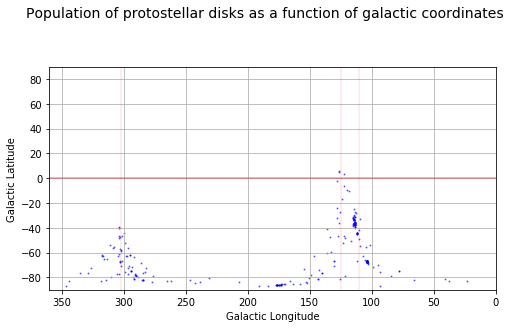

In [24]:
#can we visualize this somehow? #can we gaussian fit to it somehow?

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1, aspect='equal')
plt.grid()
ax.scatter(c.l, c.b, s=1, color='blue', alpha=0.5)
fig.suptitle('Population of protostellar disks as a function of galactic coordinates', fontsize=14)
plt.axhline(y=0, alpha= 0.4, color='r')
plt.axvline(x=125, alpha=0.1, color='r')
plt.axvline(x=302, alpha=0.1, color='r')
plt.axvline(x=110, alpha=0.1, color='r')
ax.set_xlim(360., 0.)
ax.set_ylim(-90., 90.)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

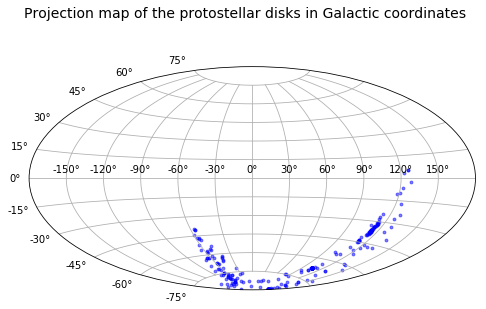

In [25]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Projection map of the protostellar disks in Galactic coordinates', fontsize=14)
ax = fig.add_subplot(1,1,1, projection='aitoff')
ax.scatter(l_rad, b_rad, s=8, color='blue', alpha=0.5)
ax.grid()

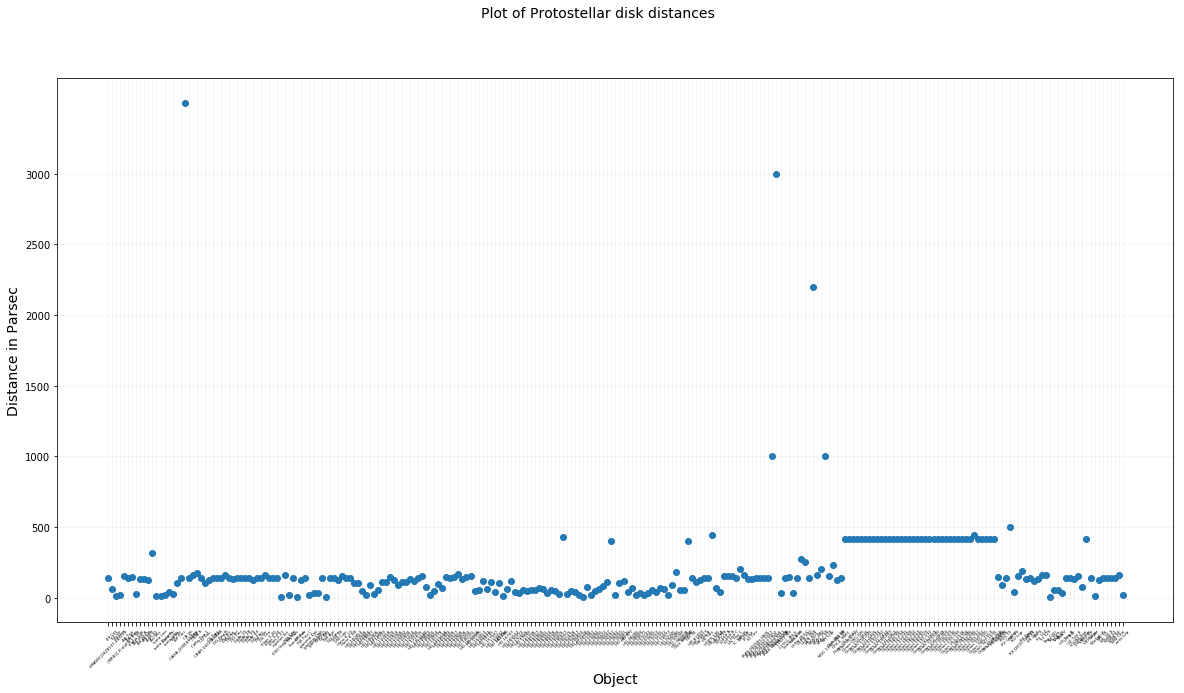

In [26]:
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(astrometry['Object'], astrometry['Distance_pc'])

fig.suptitle('Plot of Protostellar disk distances', fontsize=14)

#plt.axhline(y=320, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Distance in Parsec', fontsize=14)

plt.yticks(np.arange(0, 3500, step=500))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

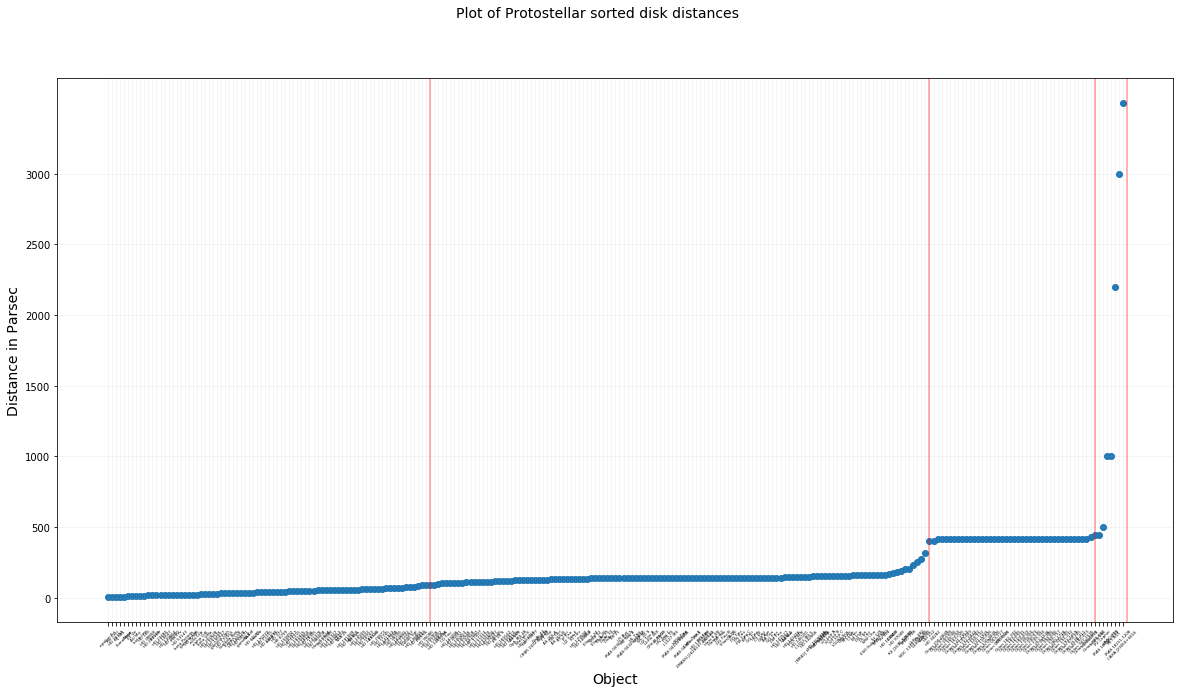

In [27]:
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(sorted_objects['Object'], sorted_objects['Distance_pc']   )

fig.suptitle('Plot of Protostellar sorted disk distances', fontsize=14)

plt.axvline(x=80, alpha= 0.4, color='r')
plt.axvline(x=204, alpha= 0.4, color='r')
plt.axvline(x=245, alpha= 0.4, color='r')
plt.axvline(x=253, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Distance in Parsec', fontsize=14)

plt.yticks(np.arange(0, 3500, step=500))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

#hard coded distance errors 
#0.02,   0.04,     0.5, to 1
#0 80, 81 204, 205 245,

In [28]:
print("From the data we can say that most protostellar disks we have discovered are within 300 parsecs from Earth")
print("Orion Star Forming Region is well represented")

From the data we can say that most protostellar disks we have discovered are within 300 parsecs from Earth
Orion Star Forming Region is well represented


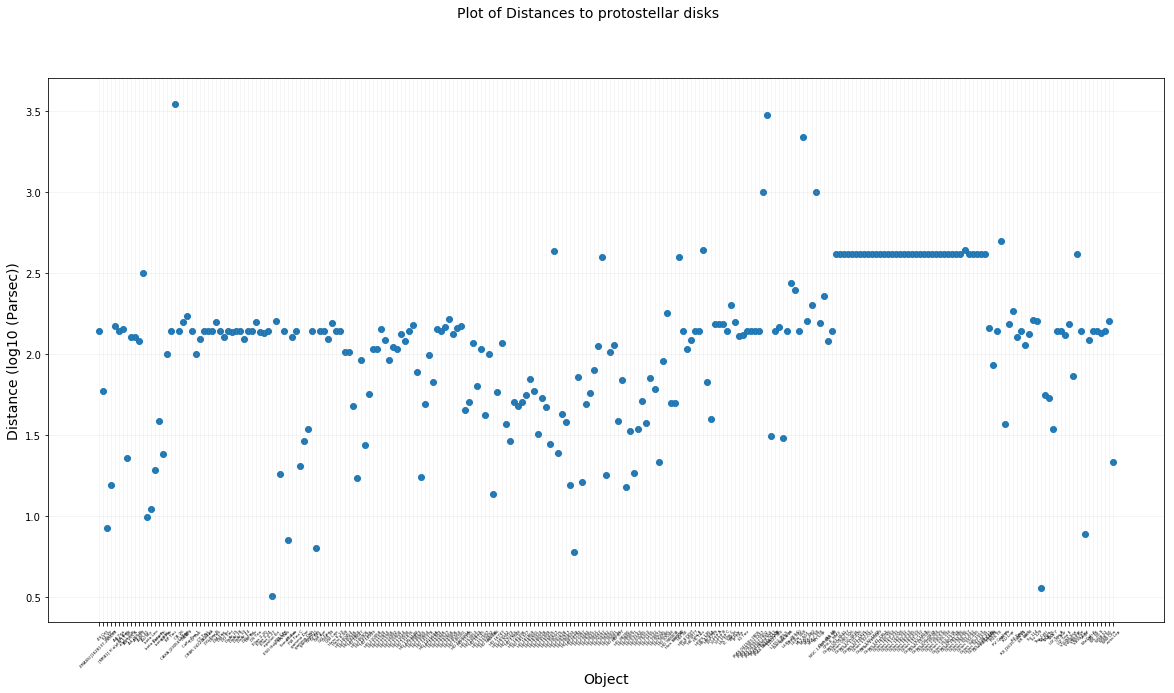

In [29]:
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(astrometry['Object'], np.log10(astrometry['Distance_pc']) )

fig.suptitle('Plot of Distances to protostellar disks', fontsize=14)

plt.xlabel('Object', fontsize=14)
plt.ylabel('Distance (log10 (Parsec))', fontsize=14)

#plt.yticks(np.arange(0, 3500, step=500))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2015.5, parallax in mas


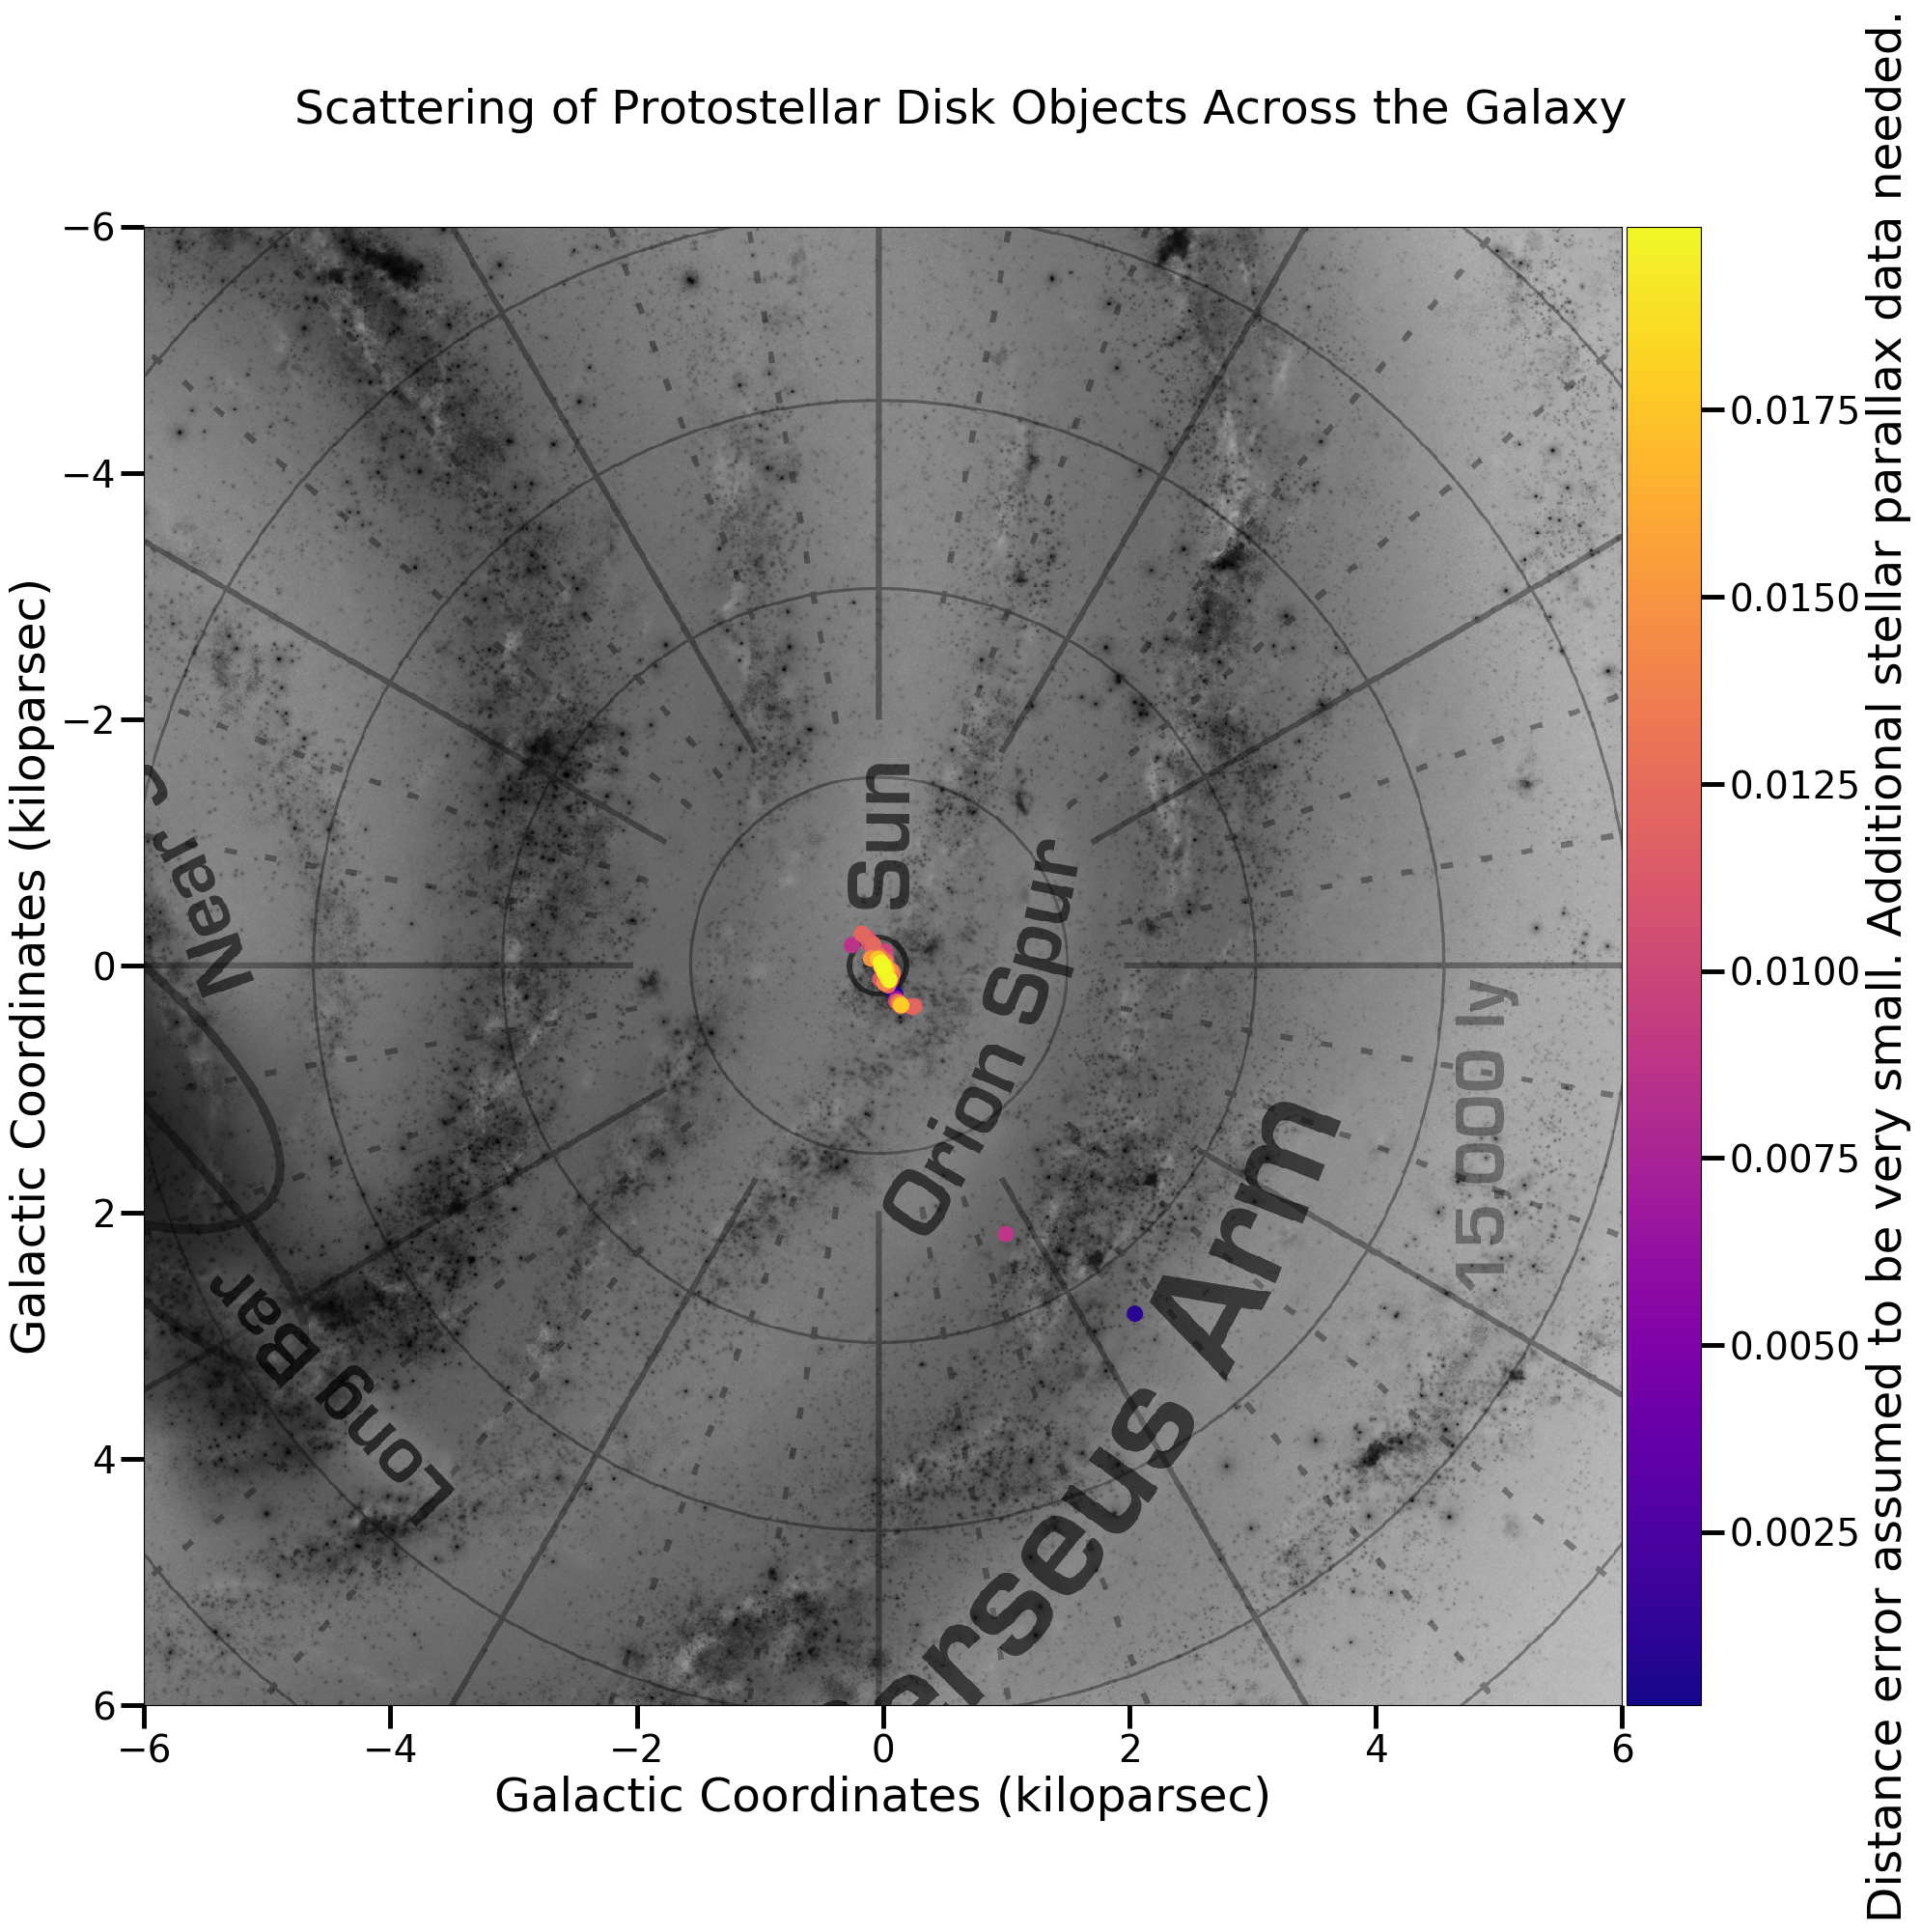

In [33]:
plot_instance = MWPlot(mode='face-on', 
                       center=(0, 0)*u.kpc,
                       radius=6* u.kpc, #2.5 looks nice
                       unit=u.kpc, 
                       coord='galactic',
                       annotation=True,
                       rot180=False, 
                       grayscale=True)

# Here are some setting you can set after setting up a MWPlot instance
plot_instance.title = 'Scattering of Protostellar Disk Objects Across the Galaxy'  # plot title, or it can be None to show no title
plot_instance.fontsize = 35  # fontsize for matplotlib plotting
plot_instance.figsize = (20, 20)  # figsize for matplotlib plotting
plot_instance.dpi = 100  # dpi for matplotlib plotting
plot_instance.alpha = 0.1  # dpi for matplotlib plottin
plot_instance.cmap = 'plasma'  # matplotlib cmap: https://matplotlib.org/examples/color/colormaps_reference.html
plot_instance.clim = (0, 0.02) # colorbar range
plot_instance.imalpha = 0.90  # alpha value for the milkyway image
plot_instance.s = 125  # make the scatter points bigger
plot_instance.tight_layout = True # whether plt.tight_layout() will be run

ra = np.array(sorted_objects['RA_J2000_Deci']) #ra[0]   #np.array(astrometry['RA_J2000_Deci'])
dec = np.array(sorted_objects['DEC_J2000_Deci'])# dec[0] #np.array(astrometry['DEC_J2000_Deci'])
ra = ra * u.deg
dec = dec * u.deg

distance = (np.array(astrometry['Distance_pc'])/1000)*u.kpc

ra2, dec2, parallax, parallax_error = gaiadr2_parallax(cuts=True, keepdims=False)

parallax = parallax[0:len(ra)] 
parallax_error = parallax_error[0:len(ra)]#constrain!

distance_err = (parallax_error / parallax)/1000
c = apycoords.SkyCoord(ra=ra, dec=dec, distance=distance, frame='icrs')
distance_err = np.sort(distance_err)

# use mw_scatter instead of scatter because we want a colorbar
# need to flip the sign of x because astropy is left-handed but mw_plot is right-handed
plot_instance.mw_scatter(-c.galactic.cartesian.x, 
                         c.galactic.cartesian.y,
                         [distance_err*100 , 'Distance error assumed to be very small. Additional stellar parallax data needed.'])

plot_instance.show()